In [7]:
import numpy as np   
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation

d_phi = 0.02
phi_min = -np.pi
phi_max = np.pi
m = 100
g = 0.01
l = 1
phi = np.arange(phi_min, phi_max, d_phi)
print(f"len(phi): {len(phi)}")
print(f"phi_check: {phi[0]} {phi[-1]}")
print(f"1/m: {1/m}")
print(f"mgl: {m*g*l}")


# KE_constant = 0.00001
# PE_constant = 0.1

dt = 0.01
steps = 100000
# gaussian with periodic boundary conditions
kappa = 5
phi_0 = 1
phi_0 = np.pi - 1
psi_phi = np.exp(kappa * np.cos(phi-phi_0))
psi_phi = psi_phi / np.sqrt(np.sum(np.abs(psi_phi)**2) * d_phi)


len(phi): 315
phi_check: -3.141592653589793 3.1384073464102125
1/m: 0.01
mgl: 1.0


In [8]:
def momentum_operator_periodic(psi, d_phi):
    '''
    Calculate the momentum operator acting on the wavefunction psi with periodic boundary conditions.
    '''
    # create an array to hold the derivative
    d_psi = np.zeros(psi.shape, dtype=complex)
    
    # calculate the derivative
    for i in range(1, len(psi)-1):
        d_psi[i] = (psi[i+1] - psi[i-1]) / (2*d_phi)
    
    # calculate the derivative at the end points
    d_psi[0] = (psi[1] - psi[-1]) / (2 * d_phi)
    d_psi[-1] = (psi[0] - psi[-2]) / (2 * d_phi)
    
    return -1j * d_psi

def pendulum_potential_periodic(phi, m, g, l):
    return m * g * l * (1 - np.cos(phi))

def d_psi_pendulum(psi_phi, phi, d_phi, m=1e5, g=1e-3, l=1):
    # Calculate H_psi
    H_psi = 0.5 * (1/(m * l ** 2)) * momentum_operator_periodic(momentum_operator_periodic(psi_phi, d_phi), d_phi) + pendulum_potential_periodic(phi, m, g, l) * psi_phi
    # The derivative of psi_x is 1j * H_psi
    return -1j * H_psi

def euler_step(psi_phi, phi, d_phi, dt):
    return psi_phi + d_psi_pendulum(psi_phi, phi, d_phi) * dt

def energy(psi_phi, phi, d_phi, m=1e5, g=1e-3, l=1):
    # Calculate H_psi
    H_psi = 0.5 * (1/(m * l ** 2)) * momentum_operator_periodic(momentum_operator_periodic(psi_phi, d_phi), d_phi) + pendulum_potential_periodic(phi, m, g, l) * psi_phi

    return np.sum(np.conj(psi_phi) * H_psi) * d_phi

def phi_expectation(psi_phi, phi, d_phi):
    return np.sum(np.conj(psi_phi) * phi * psi_phi) * d_phi

def rk_step(psi_phi, phi, d_phi, dt, m, g, l):
    k1 = d_psi_pendulum(psi_phi, phi, d_phi, m, g, l)
    k2 = d_psi_pendulum(psi_phi + 0.5 * dt * k1, phi, d_phi, m, g, l)
    k3 = d_psi_pendulum(psi_phi + 0.5 * dt * k2, phi, d_phi, m, g, l)
    k4 = d_psi_pendulum(psi_phi + dt * k3, phi, d_phi, m, g, l)

    return psi_phi + dt / 6 * (k1 + 2*k2 + 2*k3 + k4)

In [9]:

step_frequency = 1000
psi_phi_t = np.zeros(shape=(step_frequency, len(psi_phi)), dtype=complex)
phi_expectations = np.zeros(shape=(step_frequency))
energy_t = np.zeros(shape=(step_frequency))
for i in range(steps):
    psi_phi = rk_step(psi_phi, phi, d_phi, dt, m, g, l)

    if i % int(steps/step_frequency) == 0:
        print(f"i: {i}")
        # record psi_x
        psi_phi_t[int(i/int(steps/step_frequency))] = psi_phi
        phi_expectations[int(i/int(steps/step_frequency))] = np.real(phi_expectation(psi_phi, phi, d_phi))
        energy_t[int(i/int(steps/step_frequency))] = energy(psi_phi, phi, d_phi, m, g, l)
        print(f"Energy: {energy_t[int(i/int(steps/step_frequency))]}")
        print(f"Position Expectation: {phi_expectations[int(i/int(steps/step_frequency))]}")
        np.save("data/psi_phi_t_progress.npy", psi_phi_t)

    # E = energy(psi_phi, d_phi, m, g, l)
    # if np.real(E) > 5:
    #     break

i: 0
Energy: 1.5244672112687203
Position Expectation: 2.132133097394723
i: 100
Energy: 1.5244672111965276
Position Expectation: 2.1283294973091977
i: 200
Energy: 1.5244672111243356
Position Expectation: 2.1162872478937205


<ipython-input-9-31b39ae5098f>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  energy_t[int(i/int(steps/step_frequency))] = energy(psi_phi, phi, d_phi, m, g, l)


i: 300
Energy: 1.5244672110521438
Position Expectation: 2.0961007858386247
i: 400
Energy: 1.5244672109799515
Position Expectation: 2.0677361236674576
i: 500
Energy: 1.5244672109077602
Position Expectation: 2.0311375772217977
i: 600
Energy: 1.524467210835569
Position Expectation: 1.9862410264525665
i: 700
Energy: 1.5244672107633779
Position Expectation: 1.932983342660304
i: 800
Energy: 1.524467210691187
Position Expectation: 1.8713121184358428
i: 900
Energy: 1.5244672106189967
Position Expectation: 1.801196522424353
i: 1000
Energy: 1.5244672105468065
Position Expectation: 1.7226394727921894
i: 1100
Energy: 1.5244672104746164
Position Expectation: 1.635690933410833
i: 1200
Energy: 1.5244672104024266
Position Expectation: 1.540461757741791
i: 1300
Energy: 1.5244672103302375
Position Expectation: 1.4371371920059968
i: 1400
Energy: 1.5244672102580488
Position Expectation: 1.3259889744084432
i: 1500
Energy: 1.5244672101858594
Position Expectation: 1.2073849641819256
i: 1600
Energy: 1.5244672

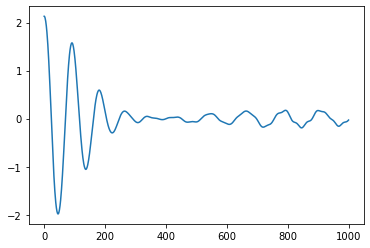

In [10]:
# plot phi_expectations
plt.plot(phi_expectations)
plt.show()

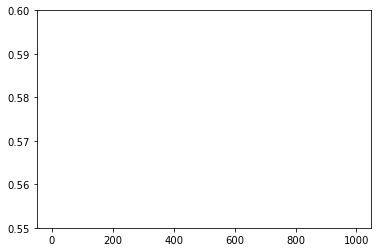

In [11]:
# plot energies
plt.plot(energy_t[:5000])
plt.ylim(0.55, 0.60)
plt.show()

In [12]:
# save psi_phi_t
np.save(f"data/psi_phi_t_m={m},g={g},l={l},kappa={kappa},phi_0={phi_0}.npy", psi_phi_t)